# Análise Detalhada da Convergência do Controlador ACO
Este notebook carrega o CSV detalhado de convergência gerado pelo controlador e plota métricas relevantes para cada fase (ACSVehicle e ACSTime).

In [1]:
# Instale dependências se necessário
!pip install pandas matplotlib ipython --quiet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import display, Markdown

csv_path = r'C:\Users\Gabriel\Desktop\busStops\output\controller_convergence_detailed.csv'

if not os.path.exists(csv_path):
    display(Markdown(f'**Arquivo não encontrado:** `{csv_path}`'))
else:
    df = pd.read_csv(csv_path)
    display(Markdown(f'**Arquivo carregado:** `{csv_path}`'))
    display(df.head())

**Arquivo carregado:** `C:\Users\Gabriel\Desktop\busStops\output\controller_convergence_detailed.csv`

,v,phase,coverage,total_time,count,uncovered_stops,reason_for_switch,delta_time,delta_coverage,improvement_found,pheromone_mean,pheromone_min,pheromone_max
0,1,ACSVehicle,96.0,20410.611190,6,1,coverage<99.9,NaN,NaN,NaN,0.908292,0.90000,1.066667
1,2,ACSVehicle,100.0,27973.564226,5,0,coverage>=99.9,NaN,NaN,NaN,0.827413,0.81000,1.160000
2,2,ACSTime,96.0,17175.214504,5,1,ACSTime phase,-10798.349723,-4.0,True,0.763245,0.72900,1.424000
3,3,ACSVehicle,96.0,20553.909484,5,1,coverage<99.9,NaN,NaN,NaN,0.705196,0.65610,1.661600
4,4,ACSVehicle,100.0,27756.949788,6,0,coverage>=99.9,NaN,NaN,NaN,0.643245,0.59049,1.662107


## Cobertura e Tempo Total por Fase
Compara a cobertura (%) e o tempo total para cada valor de v, separando as fases ACSVehicle e ACSTime.

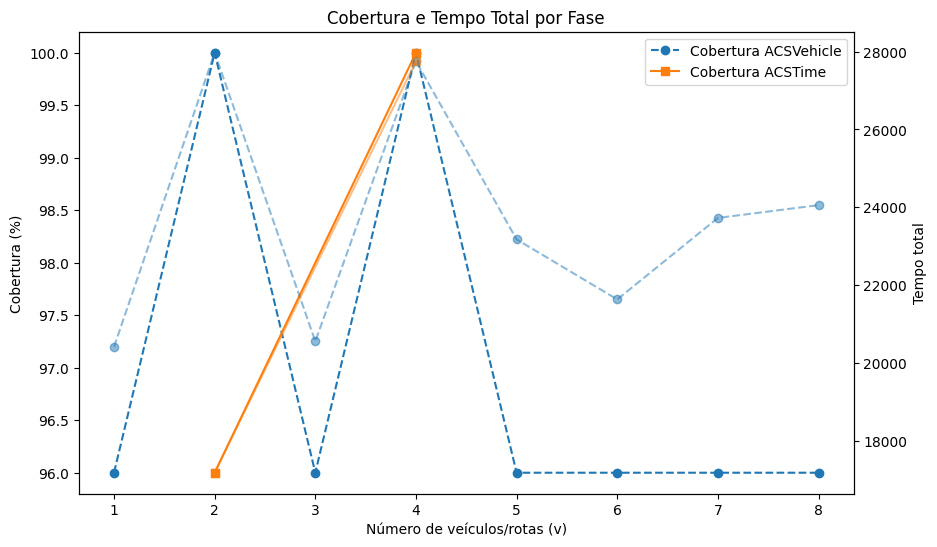

In [6]:
if 'coverage' in df.columns and 'total_time' in df.columns and 'phase' in df.columns and 'v' in df.columns:
    fig, ax1 = plt.subplots(figsize=(10,6))
    for phase, style in zip(['ACSVehicle', 'ACSTime'], ['--o', '-s']):
        d = df[df['phase'] == phase]
        ax1.plot(d['v'], d['coverage'], style, label=f'Cobertura {phase}')
    ax1.set_ylabel('Cobertura (%)')
    ax1.set_xlabel('Número de veículos/rotas (v)')
    ax1.legend(loc='upper right')
    ax2 = ax1.twinx()
    for phase, style in zip(['ACSVehicle', 'ACSTime'], ['--o', '-s']):
        d = df[df['phase'] == phase]
        ax2.plot(d['v'], d['total_time'], style, label=f'Tempo total {phase}', alpha=0.5)
    ax2.set_ylabel('Tempo total')
    plt.title('Cobertura e Tempo Total por Fase')
    plt.show()
else:
    print('Colunas necessárias não encontradas.')

## Delta de Tempo e Cobertura (Melhoria do ACSTime sobre ACSVehicle)
Mostra quanto o ACSTime melhorou (ou não) em relação ao ACSVehicle para cada v.

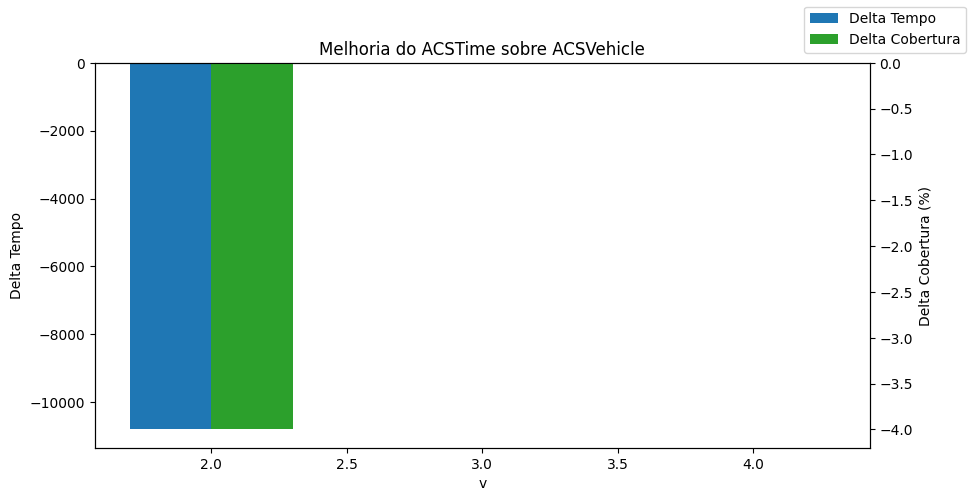

In [7]:
if 'delta_time' in df.columns and 'delta_coverage' in df.columns and 'phase' in df.columns and 'v' in df.columns:
    d = df[df['phase'] == 'ACSTime']
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax1.bar(d['v']-0.15, d['delta_time'], width=0.3, label='Delta Tempo', color='tab:blue')
    ax2 = ax1.twinx()
    ax2.bar(d['Número de veículos/rotas (v)']+0.15, d['delta_coverage'], width=0.3, label='Delta Cobertura', color='tab:green')
    ax1.set_xlabel('v')
    ax1.set_ylabel('Delta Tempo')
    ax2.set_ylabel('Delta Cobertura (%)')
    plt.title('Melhoria do ACSTime sobre ACSVehicle')
    fig.legend(loc='upper right')
    plt.show()
else:
    print('Colunas necessárias não encontradas.')

## Número de Rotas e Paradas Não Cobertas
Visualiza quantas rotas foram usadas e quantas paradas ficaram não cobertas em cada fase.

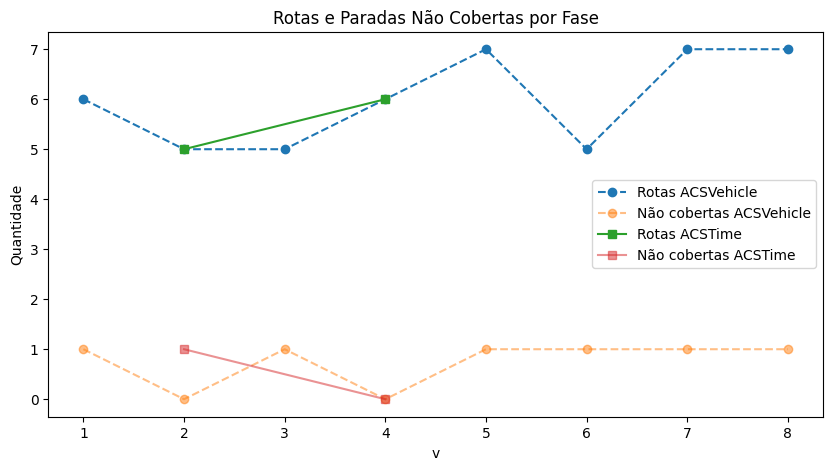

In [8]:
if 'count' in df.columns and 'uncovered_stops' in df.columns and 'phase' in df.columns and 'v' in df.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    for phase, style in zip(['ACSVehicle', 'ACSTime'], ['--o', '-s']):
        d = df[df['phase'] == phase]
        ax.plot(d['v'], d['count'], style, label=f'Rotas {phase}')
        ax.plot(d['v'], d['uncovered_stops'], style, label=f'Não cobertas {phase}', alpha=0.5)
    ax.set_xlabel('v')
    ax.set_ylabel('Quantidade')
    plt.title('Rotas e Paradas Não Cobertas por Fase')
    ax.legend()
    plt.show()
else:
    print('Colunas necessárias não encontradas.')

## Melhoria Encontrada?
Mostra para cada v se o ACSTime encontrou melhoria em relação ao ACSVehicle.

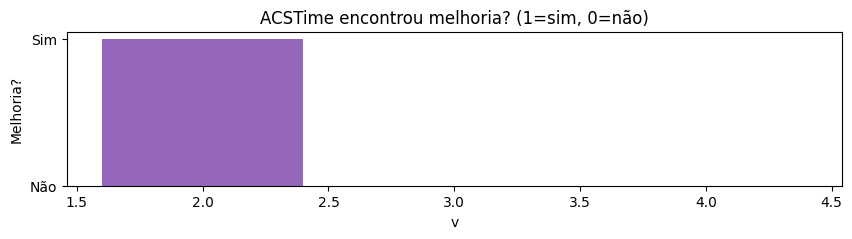

In [9]:
if 'improvement_found' in df.columns and 'phase' in df.columns and 'v' in df.columns:
    d = df[df['phase'] == 'ACSTime']
    plt.figure(figsize=(10,2))
    plt.bar(d['v'], d['improvement_found'].astype(bool), color='tab:purple')
    plt.xlabel('v')
    plt.ylabel('Melhoria?')
    plt.title('ACSTime encontrou melhoria? (1=sim, 0=não)')
    plt.yticks([0,1], ['Não','Sim'])
    plt.show()
else:
    print('Colunas necessárias não encontradas.')